In [1]:
# Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Example: using k=5

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [ ]:

# Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.
# Importing necessary libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Load the Boston housing dataset
boston = load_boston()
X = boston.data  # Features
y = boston.target  # Target variable (house prices)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Example: using k=5

# Fit the regressor to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate and print the mean squared error (MSE)
R_square = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {R_square}')

Optimal k: 11


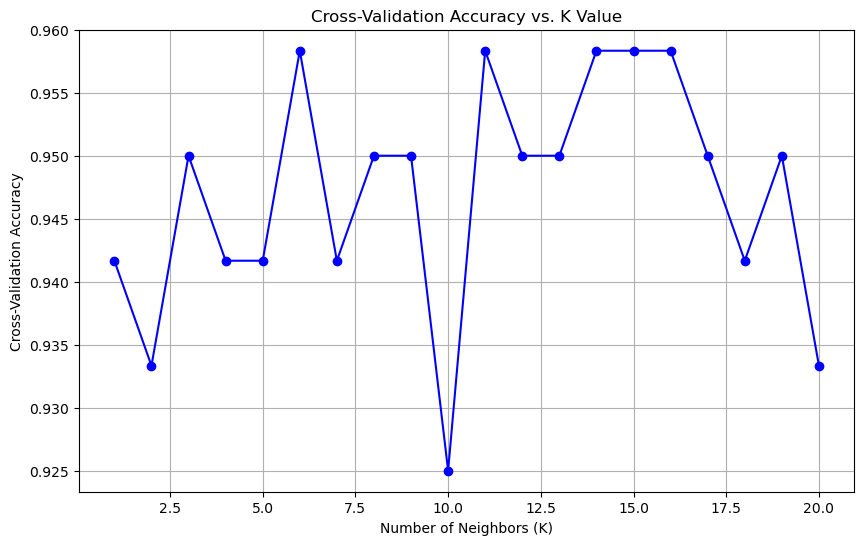

In [5]:
# Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
# cross-validation on load_iris dataset in sklearn.datasets.
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Define a range of k values to test (1 to 20, for example)
k_values = list(range(1, 21))

# Perform 10-fold cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k by maximizing cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal k: {optimal_k}')

# Plotting the cross-validation scores for each k
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()


In [ ]:
# Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
# sklearn.datasets.\
# Importing necessary libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset
boston = load_boston()
X = boston.data  # Features
y = boston.target  # Target variable (house prices)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Example: using k=5

# Fit the regressor to the scaled training data
knn.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = knn.predict(X_test_scaled)

# Calculate and print the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (after scaling): {mse}')


In [6]:
# Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
# load_iris dataset in sklearn.datasets.
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with weighted voting
# Here, weights are set to 'distance' to give higher weight to closer neighbors
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Example: using k=5 and distance-based weights

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [ ]:
# Q6. Implement a function to standardise the features before applying KNN classifier.
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler

def standardize_features(X_train, X_test):
    """
    Standardizes features using StandardScaler.

    Parameters:
    X_train : array-like, shape (n_samples, n_features)
        Training data.
    X_test : array-like, shape (n_samples, n_features)
        Test data.

    Returns:
    X_train_scaled : array-like, shape (n_samples, n_features)
        Standardized training data.
    X_test_scaled : array-like, shape (n_samples, n_features)
        Standardized test data.
    """
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit and transform on training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform on test data (using the same scaler)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

# Example usage:
# Assume X_train and X_test are already defined
# X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)


In [7]:
# Q7. Write a Python function to calculate the euclidean distance between two points.
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    point1 : array-like
        Coordinates of point 1.
    point2 : array-like
        Coordinates of point 2.

    Returns:
    distance : float
        Euclidean distance between point1 and point2.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    # Calculate Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2)**2))
    
    return distance

# Example usage:
# Define two points
point1 = [1, 2, 3]
point2 = [4, 5, 6]

# Calculate Euclidean distance between point1 and point2
distance = euclidean_distance(point1, point2)
print(f'Euclidean distance between {point1} and {point2}: {distance}')


Euclidean distance between [1, 2, 3] and [4, 5, 6]: 5.196152422706632


In [8]:
# Q8. Write a Python function to calculate the manhattan distance between two points.
import numpy as np

def manhattan_distance(point1, point2):
    """
    Calculate the Manhattan distance between two points.

    Parameters:
    point1 : array-like
        Coordinates of point 1.
    point2 : array-like
        Coordinates of point 2.

    Returns:
    distance : float
        Manhattan distance between point1 and point2.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    # Calculate Manhattan distance
    distance = np.sum(np.abs(point1 - point2))
    
    return distance

# Example usage:
# Define two points
point1 = [1, 2, 3]
point2 = [4, 5, 6]

# Calculate Manhattan distance between point1 and point2
distance = manhattan_distance(point1, point2)
print(f'Manhattan distance between {point1} and {point2}: {distance}')


Manhattan distance between [1, 2, 3] and [4, 5, 6]: 9
